In [1]:
import pandas as pd

df = pd.read_csv("data/Wholesale.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [2]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Channel列とRegion列は、文字列データに対して１からの整数を降っている状態。
これだと、Channel列とRegion列の値が大きいほうが重要なデータとして扱われてしまう。
機械学習で使えるデータにするためには、ダミー変数化をする必要がある

今回は列を削除する方法で対応する

In [3]:
df = df.drop(["Channel", "Region"], axis=1)

In [4]:
# データの標準化をする
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_df = sc.fit_transform(df)
sc_df = pd.DataFrame(sc_df, columns=df.columns)

In [5]:
from sklearn.cluster import KMeans

In [6]:
model = KMeans(n_clusters=3, random_state=0)
model.fit(sc_df)


/Users/hiroaki/dev/learn/python/learn-sukkiri-ml/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

In [7]:
model.labels_
# クラスタが３つなので、０、１、２の３つの値が出力される

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 1, 0, 1, 2,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,

In [8]:
sc_df["cluster"] = model.labels_
sc_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,1
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,1
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,1


In [9]:
sc_df.groupby("cluster").mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
0,-0.500975,0.602638,0.876336,-0.345924,0.875403,0.083414
1,0.117047,-0.346099,-0.422979,0.080848,-0.418464,-0.118125
2,1.233009,4.042758,3.717242,0.850661,3.603866,2.449666


<Axes: xlabel='cluster'>

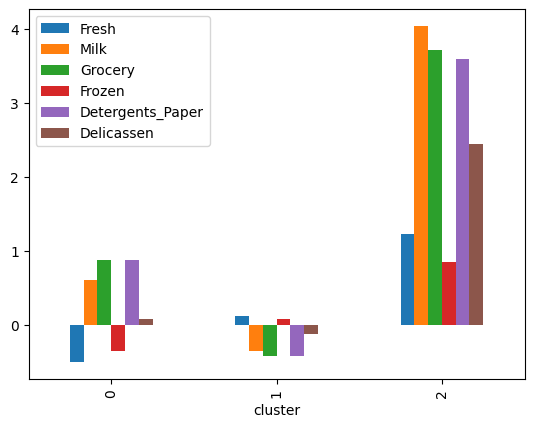

In [10]:
%matplotlib inline
cluster_mean = sc_df.groupby("cluster").mean()
cluster_mean.plot(kind='bar')

In [11]:
sse_list = []
#クラスター数2〜30でSSEを調べる
for n in range(2, 31):
    model = KMeans(n_clusters=n, random_state=0)
    model.fit(sc_df)
    sse = model.inertia_
    sse_list.append(sse)
sse_list

/Users/hiroaki/dev/learn/python/learn-sukkiri-ml/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hiroaki/dev/learn/python/learn-sukkiri-ml/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hiroaki/dev/learn/python/learn-sukkiri-ml/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hiroaki/dev/learn/python/learn-sukkiri-ml/venv/lib/

[2047.110061980732,
 1620.301764863545,
 1320.8024172270043,
 1069.2617280235431,
 925.8897808811267,
 848.009615592584,
 770.2863093315701,
 679.116270553516,
 624.3456983136944,
 575.0173729891545,
 554.1058024776564,
 506.4236420221483,
 477.20591647134074,
 451.0818783012284,
 421.3588263536916,
 401.8631192009017,
 381.90942204792617,
 352.798518485075,
 340.9867006331233,
 335.4108408465002,
 315.33009206730645,
 291.43446782833075,
 274.67336764690333,
 266.2148929664353,
 261.7789101556416,
 247.94501695867203,
 244.16519253061003,
 232.53081958103482,
 220.3282419109442]

<Axes: >

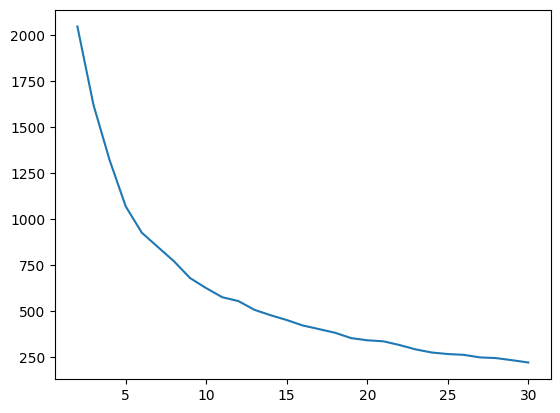

In [12]:
se = pd.Series(sse_list)
num = range(2, 31)
se.index = num
se.plot(kind='line')


In [13]:
model = KMeans(n_clusters=5, random_state=0)
model.fit(sc_df)
sc_df["cluster"] = model.labels_
sc_df.to_csv("out/clustered_Wholesale.csv", index=False)

/Users/hiroaki/dev/learn/python/learn-sukkiri-ml/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
